In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings

warnings.filterwarnings("ignore")

In [33]:
base_dir = "C:/Users/natda/Desktop/NatDave/Academics/PhD_NU/RESEARCH/BlueBikes/"

# Load cleaned trip data with engineered features
feature_engineered_path = os.path.join(base_dir, "feature_engineered_trips.csv")
df = pd.read_csv(feature_engineered_path)

# Load station distance matrix
distance_matrix_path = os.path.join(base_dir, "station_distance_matrix.csv")
distance_matrix = pd.read_csv(distance_matrix_path, index_col=0).fillna(0)

In [34]:
distance_matrix

,A32000,A32001,A32002,A32003,A32004,A32005,A32006,A32008,A32009,A32010,...,W32001,W32002,W32004,W32005,W32006,W32007,Z32997,Z32998,Z32999,ZZ32996
A32000,0.000,8506.108,6927.456,6326.381,6246.251,8529.027,6784.313,5887.963,3672.844,1577.612,...,10541.740,12346.775,9933.209,12657.050,11743.605,10359.738,4986.955,4118.959,11313.755,10919.628
A32001,8225.287,0.000,1596.269,2334.370,3385.465,1177.056,2233.504,2816.781,5615.048,6987.961,...,3478.109,4268.059,2547.720,4578.334,3503.690,2974.249,4559.954,4688.625,11712.145,9003.798
A32002,6673.022,1578.652,0.000,782.105,2094.204,2722.218,2581.520,1264.516,4062.783,5435.696,...,5023.271,5813.221,4092.882,6123.496,5048.852,4519.411,3007.689,3401.581,10889.592,9494.151
A32003,5890.917,2348.350,769.698,0.000,1812.241,3491.916,2037.135,564.214,3280.678,4653.591,...,5792.969,6582.919,4862.580,6893.194,5818.550,5289.109,2307.387,2857.196,10679.193,8949.766
A32004,6058.373,3402.921,2091.765,1693.981,0.000,4546.487,3731.116,1271.010,2934.635,4821.047,...,6847.540,7637.490,5917.151,7947.765,6873.121,6343.680,1278.517,4275.277,9047.501,10643.747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W32007,11056.075,2901.971,4498.240,5236.341,6287.436,2134.687,4181.446,5718.752,8517.019,9889.932,...,503.860,2700.252,612.031,3010.527,2107.183,0.000,7461.925,6758.853,14614.116,7201.561
Z32997,4847.464,4638.453,3059.801,2290.103,1315.124,5782.019,4327.238,1781.857,1689.477,3610.138,...,8083.072,8873.022,7152.683,9183.297,8108.653,7579.212,0.000,3477.595,8715.030,10622.147
Z32998,4431.761,4983.762,3565.965,3081.407,4099.972,4541.511,2796.797,3329.236,3698.110,3822.527,...,6422.781,8359.259,5945.693,8669.534,7756.089,6372.222,3631.968,0.000,11868.403,7685.937
Z32999,11116.804,11832.608,10995.955,10598.171,9229.825,12976.174,12635.306,10222.286,8915.192,10408.262,...,15277.227,15457.734,14346.838,15900.665,15120.146,14773.367,8819.502,12045.696,0.000,19190.248


In [35]:
# Create a pivot table to count trips between stations
trip_count_matrix = df.pivot_table(
    index='start_station_id',
    columns='end_station_id',
    values='trip_duration_minutes',  # Any column can be used here
    aggfunc='count',
    fill_value=0
)

trip_count_matrix

end_station_id,A32000,A32001,A32002,A32003,A32004,A32005,A32006,A32008,A32009,A32010,...,W32006,W32007,W32009,W32010,X32999,Z32997,Z32998,Z32999,ZZ32996,c32014
start_station_id,,,,,,,,,,,,,,,,,,,,,
A32000,501,2,6,4,4,0,8,1,29,428,...,0,0,0,0,0,8,2,0,0,8
A32001,4,330,701,397,156,146,55,131,7,30,...,22,25,10,1,0,56,1,0,1,0
A32002,14,934,597,1103,149,95,51,1216,18,52,...,10,4,8,0,0,85,7,0,7,0
A32003,2,382,1969,275,42,37,46,208,6,35,...,6,3,2,0,0,21,9,0,0,0
A32004,8,234,228,43,330,130,282,190,81,155,...,3,7,1,0,0,93,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z32997,1,27,106,23,83,6,2,48,9,19,...,0,0,1,0,0,158,2,0,0,0
Z32998,3,17,15,4,18,8,17,36,3,76,...,0,0,0,0,0,8,78,0,1,0
Z32999,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,37,0,0


In [36]:
# Filter data for each bike type
electric_df = df[df['bike_type'] == 'electric']
traditional_df = df[df['bike_type'] == 'traditional']

# Pivot table for electric bikes
electric_trip_count_matrix = electric_df.pivot_table(
    index='start_station_id',
    columns='end_station_id',
    values='trip_duration_minutes',
    aggfunc='count',
    fill_value=0
)

# Pivot table for traditional bikes
traditional_trip_count_matrix = traditional_df.pivot_table(
    index='start_station_id',
    columns='end_station_id',
    values='trip_duration_minutes',
    aggfunc='count',
    fill_value=0
)

In [37]:
# Function to calculate distances for a given trip count matrix
def calculate_distances(trip_count_matrix, distance_matrix):
    distances = []
    # Get the common station ids present in both DataFrames
    valid_station_names = trip_count_matrix.index.intersection(distance_matrix.index)
    # Subset both DataFrames to only include the common station ids
    trip_count_matrix_subset = trip_count_matrix.reindex(
        index=valid_station_names,
        columns=valid_station_names
    )
    distance_matrix_subset = distance_matrix.reindex(
        index=valid_station_names,
        columns=valid_station_names
    )
    for start_station in trip_count_matrix_subset.index:
        for end_station in trip_count_matrix_subset.columns:
            trip_count = trip_count_matrix_subset.loc[start_station, end_station]
            distance = distance_matrix_subset.loc[start_station, end_station]
            distances.extend([distance] * trip_count)
    return distances

# Calculate distances for 1) all, 2) electric and 3) traditional bike trips
distances = calculate_distances(trip_count_matrix, distance_matrix)
electric_distances = calculate_distances(electric_trip_count_matrix, distance_matrix)
traditional_distances = calculate_distances(traditional_trip_count_matrix, distance_matrix)

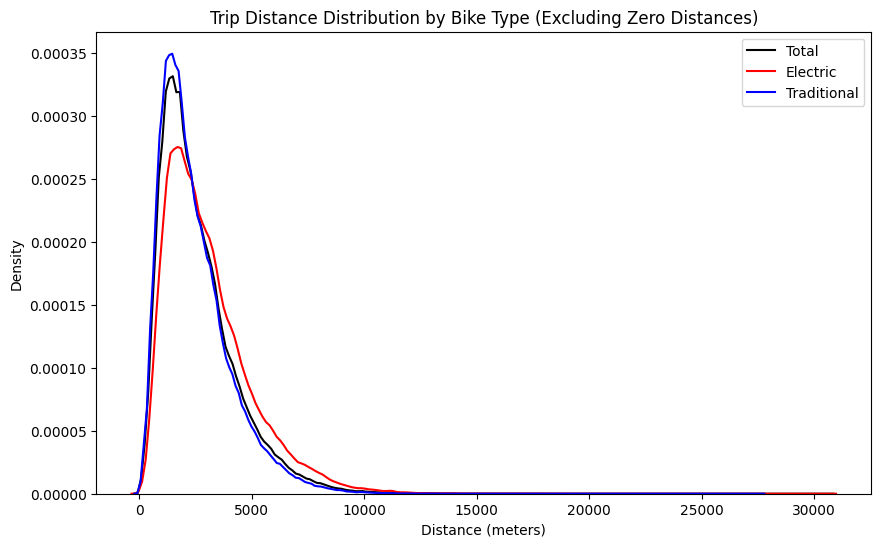

In [38]:
plt.figure(figsize=(10, 6))
sns.kdeplot([d for d in distances if d != 0], color='black', label='Total')
sns.kdeplot([d for d in electric_distances if d != 0], color='red', label='Electric')
sns.kdeplot([d for d in traditional_distances if d != 0], color='blue', label='Traditional')
plt.title('Trip Distance Distribution by Bike Type (Excluding Zero Distances)')
plt.xlabel('Distance (meters)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [42]:
# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(electric_distances, traditional_distances)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean trip distances between electric and traditional bikes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean trip distances between electric and traditional bikes.")

T-statistic: 318.7650947322784
P-value: 0.0
Reject the null hypothesis: There is a significant difference in mean trip distances between electric and traditional bikes.


In [43]:
# Perform the one-tailed t-test
t_statistic, p_value = stats.ttest_ind(
    electric_distances, traditional_distances, alternative='greater'
)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean trip distance for electric bikes is significantly greater than for traditional bikes.")
else:
    print("Fail to reject the null hypothesis: There is no significant evidence that the mean trip distance for electric bikes is greater than for traditional bikes.")

T-statistic: 318.7650947322784
P-value: 0.0
Reject the null hypothesis: The mean trip distance for electric bikes is significantly greater than for traditional bikes.


In [ ]:
# Function to calculate z-statistic and p-value for two-sample z-test
def two_sample_z_test(mean_1, mean_2, var_1, var_2, n_1, n_2):
    std_1, std_2 = math.sqrt(var_1), math.sqrt(var_2)
    z = (mean_1 - mean_2) / math.sqrt((std_1**2 / n_1) + (std_2**2 / n_2))
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))  # Two-tailed p-value
    return z, p_value

# Function to calculate confidence interval for the difference of means
def confidence_interval(mean_1, mean_2, var_1, var_2, n_1, n_2, confidence_level=0.95):
    std_1, std_2 = math.sqrt(var_1), math.sqrt(var_2)
    z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_critical * math.sqrt((std_1**2 / n_1) + (std_2**2 / n_2))
    difference_in_means = mean_1 - mean_2
    ci_lower = difference_in_means - margin_of_error
    ci_upper = difference_in_means + margin_of_error
    return ci_lower, ci_upper

# Data for e-bikes and traditional bikes
mean_e_bike, mean_traditional_bike = 13.95, 15.15
var_e_bike, var_traditional_bike = 152.96, 180.15
n_e_bike, n_traditional_bike = 1038644, 3265180

# Perform z-test
z_statistic, p_value = two_sample_z_test(mean_e_bike, mean_traditional_bike, var_e_bike, var_traditional_bike, n_e_bike, n_traditional_bike)

# Calculate the confidence interval for the difference in means
ci_lower, ci_upper = confidence_interval(mean_e_bike, mean_traditional_bike, var_e_bike, var_traditional_bike, n_e_bike, n_traditional_bike)

# Output results and hypothesis decision
alpha = 0.05
print(f"Z-statistic: {z_statistic}\nP-value: {p_value}")
print("Reject H₀: Significant difference." if p_value < alpha else "Fail to reject H₀: No significant difference.")
print(f"95% Confidence Interval for the Difference in Means: ({ci_lower}, {ci_upper})")

In [ ]:
# Filter data for electric bikes and traditional bikes
electric_bike_data = combined_df[combined_df['bike_type'] == 'electric']
traditional_bike_data = combined_df[combined_df['bike_type'] == 'traditional']

# Perform ANOVA for e-bikes and traditional bikes separately
# For e-bikes, group by 'season' and get the trip duration
e_bike_seasonal_data = electric_bike_data.groupby('season')['trip_duration_minutes'].apply(list)

# For traditional bikes, group by 'season' and get the trip duration
traditional_bike_seasonal_data = traditional_bike_data.groupby('season')['trip_duration_minutes'].apply(list)

# Perform ANOVA test for e-bikes
e_bike_f_statistic, e_bike_p_value = stats.f_oneway(*e_bike_seasonal_data)

# Perform ANOVA test for traditional bikes
traditional_bike_f_statistic, traditional_bike_p_value = stats.f_oneway(*traditional_bike_seasonal_data)

# Output the results for e-bikes and traditional bikes
print(f"E-Bikes - F-statistic: {e_bike_f_statistic}, P-value: {e_bike_p_value}")
print(f"Traditional Bikes - F-statistic: {traditional_bike_f_statistic}, P-value: {traditional_bike_p_value}")

# Decision based on p-value
alpha = 0.05

# E-bike results
if e_bike_p_value < alpha:
    print("Reject the null hypothesis for e-bikes: There is a significant difference in trip durations across seasons.")
else:
    print("Fail to reject the null hypothesis for e-bikes: There is no significant difference in trip durations across seasons.")

# Traditional bike results
if traditional_bike_p_value < alpha:
    print("Reject the null hypothesis for traditional bikes: There is a significant difference in trip durations across seasons.")
else:
    print("Fail to reject the null hypothesis for traditional bikes: There is no significant difference in trip durations across seasons.")